
### Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories(e.g. cat, dog). 

### Regression analysis can unscramble very intricate problems where the variables are entangled like spaghetti. For example, imagine you’re a researcher studying any of the following:
- Do socio-economic status and race affect educational achievement?
- Do education and IQ affect earnings?
- Do exercise habits and diet effect weight?

### All these research questions have entwined independent variables that can influence the dependent variables. How do you untangle a web of related variables? Which variables are statistically significant and what role does each one play? Regression comes to the rescue because you can use it for all of these scenarios!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
d = pd.read_csv("../input/ecommerce-customers/Ecommerce Customers.csv")
d.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


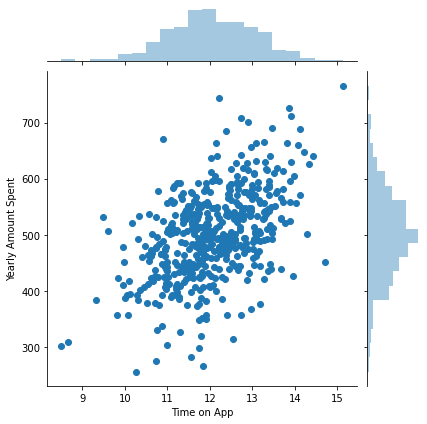

In [2]:
#we will start with some exploratory data analysis to know relations between various columns
sns.jointplot(data=d, x='Time on App', y='Yearly Amount Spent')

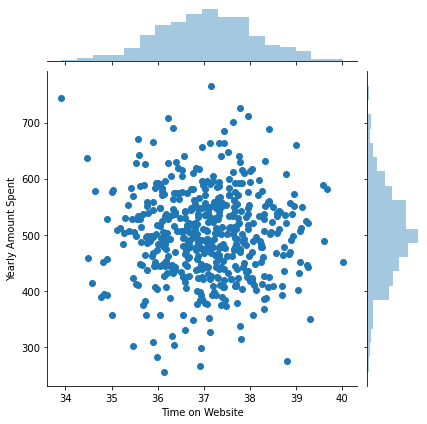

In [3]:
sns.jointplot(data=d, x='Time on Website', y='Yearly Amount Spent')

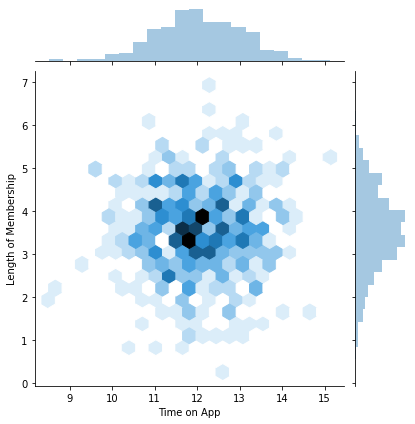

In [4]:
sns.jointplot(x='Time on App', y='Length of Membership', kind='hex', data=d)

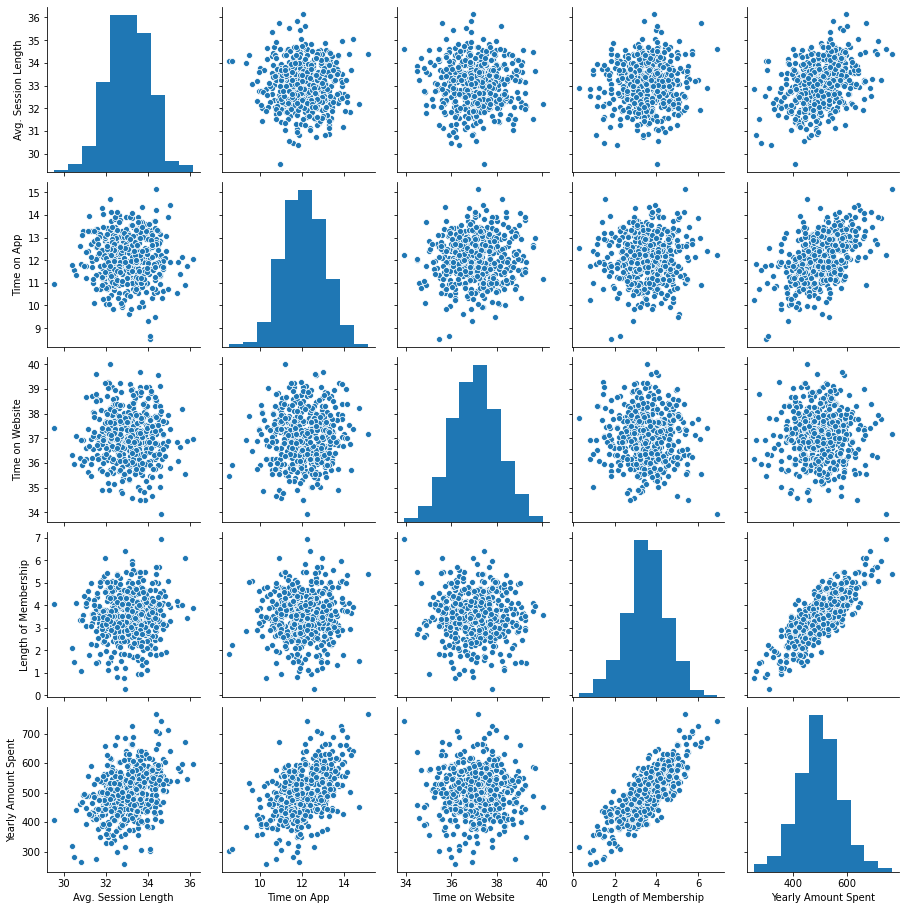

In [5]:
sns.pairplot(d)

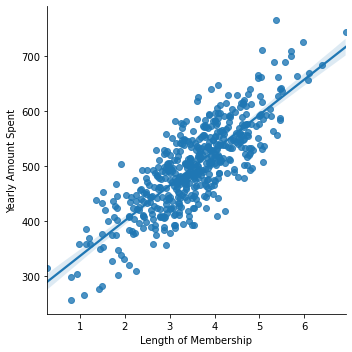

In [6]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=d)

In [7]:
d.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [8]:
#training the model
x = d[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = d['Yearly Amount Spent']
from sklearn.model_selection import train_test_split
x_test, x_train, y_test, y_train = train_test_split(x,y,test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [9]:
lm.coef_

array([25.11463945, 39.0221878 ,  0.76713598, 62.24728656])

Text(0, 0.5, 'Predicted values')

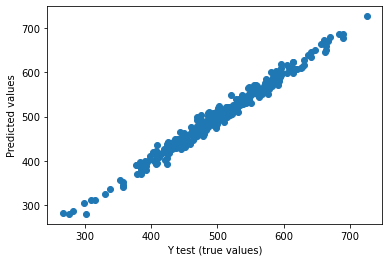

In [10]:
#after fitting our model lets evaluate its performance by predicting off the test vales
pr = lm.predict(x_test)
#lets see the relation between the real test values and the predicted values
plt.scatter(y_test, pr)
plt.xlabel('Y test (true values)')
plt.ylabel('Predicted values')


In [11]:
#lets evaluate the performance by calclating errors and residuals
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,pr))
print('MSE',metrics.mean_squared_error(y_test,pr))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,pr)))

MAE 8.277224105585296
MSE 109.36337929836583
RMSE 10.457694741116027


In [12]:
# more on metrics
# https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3

In [13]:
#the closer this is to 1 the better
metrics.explained_variance_score(y_test,pr)

0.9813919852592562

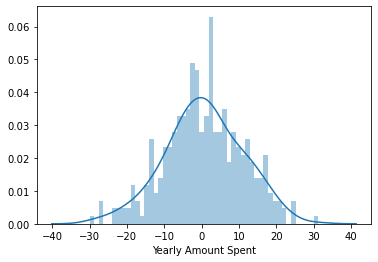

In [14]:
sns.distplot((y_test-pr), bins=50)

In [15]:
cdf = pd.DataFrame(lm.coef_,x.columns,columns=['Coeff'])
cdf

,Coeff
Avg. Session Length,25.114639
Time on App,39.022188
Time on Website,0.767136
Length of Membership,62.247287


 you would verbally describe the coefficients like this: For every one-unit increase in [X variable], the [y variable] increases by [coefficient] when all other variables are held constant